[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Copy_of_Exerci%CC%81cio_Computacional_VI_MLP.ipynb)

## Exercício Computacional VI - Rede Perceptron de Múltiplas Camadas


### Introdução

Nesse exercício iremosabordar os seguintes tópicos:

* Redes Perceptron de Múltiplas Camadas (*MultiLayer Perceptron - MLP*)
* Algoritmo *Backpropagation*

Para isso vocês irão utilizar as bibliotecas de programação científica da linguagem python (pandas, numpy, matplotlib, etc).

Inicialmente, iremos carregar todas as bibliotecas que iremos utilizar.
Execute o trecho de código abaixo para carregá-las (para executar uma célula, selecione-a e pressione ctrl+enter)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython import display
from sklearn.datasets import make_circles

np.random.seed(1)

### Rede Perceptron de Múltiplas Camadas (MLP)

Na última aula vimos que uma rede Perceptron de Múltiplas Camadas pode ser utilizada para resolver problemas não lineares de regressão e classificação de padrões. 

Esse modelo utiliza uma ou mais camadas escondidas para transformar um problema *não linear*, definido no espaço de entrada, em um problema *linear*, definido no espaço de características resultante do mapeamento das entradas pelas camadas escondidas da rede. Em seguida, a camada de saída é utilizada para resolver o probleam linear resultante da transformação.

Para facilitar o entendimento da arquitetura de uma rede MLP, iremos utilizá-la para resolver um problema real, de classificação de padrões não linear.

A figura abaixo ilustra amostras de um problema de classificação binária. Como pode ser observado, um modelo linear, como por exemplo um perceptron ou regressão logística, não é capaz de resolver o problema de forma satisfatória.

<img src="http://test.solnix.com.br/img/circles.png">

Para resolver esse problema, iremos então utilizar uma rede MLP, contendo uma camada escondida. 
A figura abaixo ilustra a topologia da rede utilizada.
A rede possui duas entradas, uma camada escondida contendo 3 neurônios e uma camada de saída. Os neurônios da camada escondida e da camada de saída possuem funções de ativação sigmoidais.

<img src="http://test.solnix.com.br/img/mlp1.png">

Essa rede possui os seguintes parâmetros (ou pesos):

$$W^{(1)} =  \left( \begin{array}{ccc}
w^{(1)}_{10} & w^{(1)}_{11} & w^{(1)}_{12}\\
w^{(1)}_{20} & w^{(1)}_{21} & w^{(1)}_{22}\\
w^{(1)}_{30} & w^{(1)}_{31} & w^{(1)}_{32}\\
\end{array} \right)
$$

$$W^{(2)} = \left( \begin{array}{ccc}
w^{(2)}_{10} & w^{(2)}_{11} & w^{(2)}_{12} & w^{(2)}_{13}
\end{array} \right)
$$

A matriz de pesos $W^{(1)}$ representa os pesos que conectam as entradas aos neurônios da camada escondida. Essa matriz tem dimensão $N_e \times d+1$, em que $N_e$ corresponde ao número de neurônios na camada escondida (para o problem em questão $N_e=2$) e $d$ corresponde à dimensão do vetor de entradas (nesse caso $d=2$). Cada linha da matriz representa os pesos associados a cada um dos $N_e$ neurônios. Cada neurônio, possui $d+1$ pesos, ou seja, $d$ pesos conectando à cada uma das entradas, além do peso que conecta ao valor de $x_0=1$, denominado de *bias*.

A matriz de pesos $W^{(2)}$ representa os pesos que conectam as saídas dos neurônios da camada escondida ao(s) neurônio(s) da camada de saída. Essa matriz tem dimensões $m \times N_e +1$, sendo $m$ o número de neurônios na camada de saída (para o problema em questão, $m=1$). Como o neurônio na camada de saída também possui um *bias*, o número de colunas de $W^{(2)}$ é igual a $N_e + 1$.

#### Saída da rede

Inicialmente, você deverá implementar uma função que calcule a saída da rede, dada uma matriz de entradas $X$, as matrizes de parâmetros (ou pesos), $W^{(1)}, W^{(2)}$. Lembre-se que a matriz de entradas $X$ tem dimensão $n \times d$, em que $n$ corresponde ao número de amostras presentes na matriz.


O algoritmo *Backpropagation* foi utilizado para estimar os parâmetros. Os vetores resultantes do treinamento foram:

$$W^{(1)} =  \left( \begin{array}{ccc}
2.9028216 & 2.24407371 & -9.20899099\\
-3.19373041 & 7.56086498 & -4.21984423\\
-2.83019706 & -4.21082338 & -4.98101915\\
\end{array} \right)
$$

$$W^{(2)} = \left( \begin{array}{ccc}
-3.55156313 & 9.13500004 &-9.00022143 &-8.8855081\end{array} \right)
$$


A partir desses pesos, a rede é capaz de distinguir entre as amostras das duas classes com erro nulo.

Para calcular a saída da rede descrita acima, para cada amostra (representada por uma linha) da matriz de entrada $X$, você deve calcular inicialmente as saídas dos neurônios da camada escondida. 

Para isso, para cada um dos $N_e$ neurônios, você deve calcular a soma  das entradas ponderadas pelos pesos dos neurônios da camada escondida:

$$u^{(1)}_j = \sum_{k=0}^d x_{ik} w^{(1)}_{jk}$$

para $j=1, \cdots, N_e$, sendo que $x_{ij}$ corresponde o $j$-ésimo elemento da $i$-ésima amostra presente na matriz $X$.

As saídas de cada um dos neurônios da camada escondida, $h^{(1)}_j$, para $j=1,\cdots,N_e$, são então estimados como o resultado da aplicação da função de ativação em $u^{(1)}_j$, ou seja:

$$h^{(1)}_j = g(u^{(1)}_j)$$

Conforme mencionado, para o problema em questão, a função de ativação $g$ é a função de ativação sigmoidal para todos os neurônios da camada escondida e da camada de saída.

Uma vez calculadas as saídas de todos os neurônios da camada escondida, a saída do modelo é estimada em dois passos. Primeiro, é calculada a soma das saídas dos neurônios ponderada pelos pesos da camada de saída, ou seja:

$$u^{(2)} = \sum_{j=0}^{N_e} h^{(1)}_j w^{(2)}_{1j}$$

sendo que $h^{(1)}_0 = 1$ e, para o problema em questão.

Em seguida, a saída final da rede é calculada como:

$$\hat{y}_i = g(u^{(2)})$$


<br>
Implemente a funcão *compute_classifier_network_output* seguindo as instruções detalhadas acima. A função deve calcular a saída do modelo $\hat{y}_i$ para cada um das $n$ amostras da matriz de entrada. Além disso, a função deve retornar a saída dos neurônios da camada escondida $h^{(1)}_{j}$ para cada uma das $n$ amostras, ou seja, a sua função deve retornar:

* uma matriz $\hat{y}$ com dimensão $n \times 1$
* uma matriz $h^{(1)}$ com dimensão $n \times N_e$ 

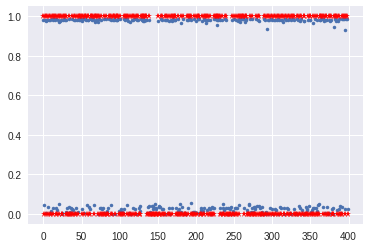

In [3]:
def sigmoidal(z):
    return 1/(1 + np.exp(-z))

def compute_classifier_network_output(X, W1, W2):
    n,x = X.shape
    Ne = W1.shape[0]
    
    u1 = np.zeros(Ne)
    h1 = np.zeros((n, Ne))
    y_hat  = np.zeros((n,1))
    
    bias = np.ones(n)
    
    new_X = np.c_[bias, X]

    u1 = np.dot(new_X, W1.T)

    h1 = sigmoidal(u1)

    new_h1 = np.c_[bias, h1]

    u2 = np.dot(new_h1, W2.T)

    y_hat = sigmoidal(u2)

    return y_hat,h1

X, y = make_circles(n_samples=400, shuffle=True, noise=.05, factor=0.1)

W1 = np.matrix([[ 2.9028216,   2.24407371, -9.20899099],
                [-3.19373041,  7.56086498, -4.21984423], 
                [-2.83019706, -4.21082338, -4.98101915]])
W2 = np.matrix([[-3.55156313,  9.13500004, -9.00022143, -8.8855081 ]])

yhat, h1 = compute_classifier_network_output(X, W1, W2)

plt.plot(yhat, '.')
plt.plot(y, 'r*')

Se sua função estiver correta, ao executar o código da próxima célula, você deverá ser capaz de ver um figura similar à figura abaixo.

<img src="http://test.solnix.com.br/img/circles_solution.png">

Essa figura representa a região de decisão do classificador. Como pode ser visto, o classificador é capaz de separar as duas classes com erro nulo.

Text(0,0.5,u'x2')

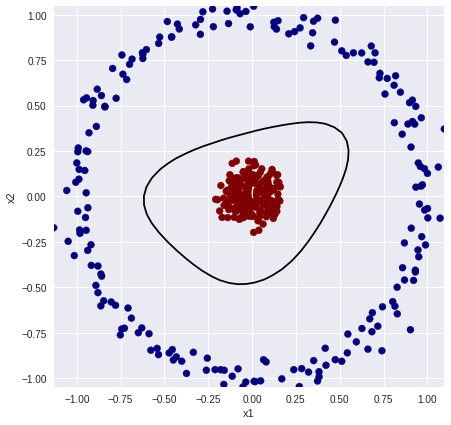

In [4]:
x1s, x2s = np.mgrid[X[:,0].min():X[:,0].max()+0.1:0.05, X[:,1].min():X[:,1].max()+0.1:0.05]
zs = np.zeros((x1s.shape[0], x2s.shape[1]))
fig = plt.figure(figsize=(7,7))
for i1 in range(x1s.shape[0]):
    for i2 in range(x2s.shape[1]):
        value = np.array([x1s[i1,0], x2s[0,i2]])
        res,_ = compute_classifier_network_output(value[np.newaxis,:], W1, W2)
        zs[i1,i2] = res[0,0]

plt.contour(x1s,x2s, zs, [0.5], colors='k')
yplot =  map(lambda v : float(v), np.asarray(y))  
plt.scatter(X[:,0],X[:,1], color=cm.jet(yplot))
plt.xlim([X[:,0].min(), X[:,0].max()])
plt.ylim([X[:,1].min(), X[:,1].max()])
plt.xlabel(r'x1')
plt.ylabel(r'x2')

Conforme mencionado, a primeira camada da rede transforma o vetor em entradas em um vetor de características que torna o problema de classificação linearmente separável. Assim, a última camada da rede resolve um problema de regressão logística, como já vimos anteriormente.

Para vizualizar a transformação, iremos plotar a saída da camada escondida correspondente a cada amostra de entrada. Isto é, para cada amostra de entrada $\mathbf{x_i}$, iremos plotar o vetor de caracerísticas correspondente $[h^{(1)}_{i1}, h^{(1)}_{i2}, h^{(1)}_{i3}]^T$, ou seja, a saída da camada escondida da rede. 

O código abaixo plota os vetores de caracteríticas.

Text(0.5,0,u'h13')

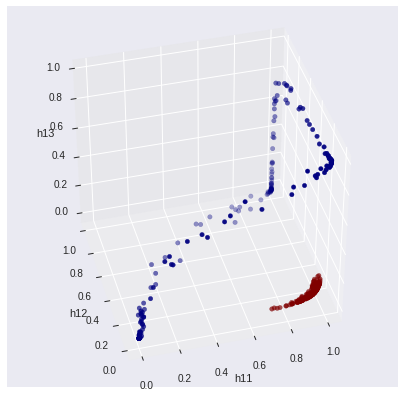

In [5]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection ='3d')
ax.scatter(h1[:,0],h1[:,1], h1[:,2], color=cm.jet(yplot))
ax.view_init(elev=40., azim=-105)
ax.set_xlabel('h11')
ax.set_ylabel('h12')
ax.set_zlabel('h13')

Analisando essa figura, percebe-se que a camada escondida da rede é capaz de transformar um problema de classificação não linear definido no espaço de entrada (ou seja, pelas entradas bidimensionais $\mathbf{x_i}=[x_{i1}, x_{i2}]^T$, para $i=1,\cdots, n$), em um problema de classificação linear definido no espaço de características (ou seja, pelas características tridimensionais estimadas pela rede, $[h^{(1)}_{i1}, h^{(1)}_{i2}, h^{(1)}_{i3}]^T$).

### Algoritmo *Backpropagation*

Nessa seção você irá implementar o algoritmo *Backpropagation* que será utilizado para estimar os parâmetros de uma rede MLP.

A rede será utilizada para resolver um problema de aproximação de uma função não linear.
Iremos aproximar uma função univariável $f : \mathbb{R} \rightarrow \mathbb{R}$. A figura abaixo ilustra $100$ amostras da função não linear que serão utilizadas para estimar os parâmetros (ou pesos) da rede.

<img src="http://test.solnix.com.br/img/sin.png">


Iremos utilizar uma rede MLP contendo uma camada escondida e uma camada de saída. A camada escondida será utilizada para transformar o vetor de entrada, em um vetor de características, de forma a tornar o problema linear, similar transformação realizada pela *função de base polinomial* abordada no Exercício Computacional 1. A partir das características extraídas, a camada de saída resolve um problema de regressão linear.

A figura abaixo ilustra a estrutura da rede MLP que iremos utilizar. A rede possui $3$ neurônios na camada escondida, com função de ativação definida como a tangente hiperbólica, e um neurônio na cada de saída, com função de ativação linear. A rede possui a mesma topologia da rede utilizada para o problema de classificação de padrões, porém as funções de ativação dos neurônios da camada escondida e da camada de saída foram modificados.

<img src="http://test.solnix.com.br/img/mlp1.png">

#### Função de Custo

A função de custo a ser minimizada é definida como a função de custo definida para regressão linear, ou seja:

$$J(W^{(1)}, W^{(2)}) = \sum_{i=1}^n (y_i - \hat{y}_i)^2$$

Conforme visto em sala, o algoritmo *Backpropagation* utiliza as derivadas parciais da função de custo em relação aos parâmetros (pesos) da rede para minimizá-la, utilizando o princípio do algoritmo do gradiente descendente.

A saída da rede MLP abordada para esse problema de regressão é definida como:

$$ \hat{y}_i = f(u^{(2)}) = u^{(2)}$$

sendo que $f$ corresponde a função de ativação linear, ou seja, $f(z) = z$.

O valor escalar $u^{(2)}$ corresponde à soma das saídas dos neurônios da camada escondida, ponderadas pelos pesos do neurônio de saída, ou seja:

$$u^{(2)} = \sum_{j=0}^{N_e} h^{(1)}_j w^{(2)}_{1j}$$

em que os valores $h^{(1)}_j$, para $j=1,\cdots,N_e$ correspondem às saídas dos neurônios da camada escondida, e $h^{(1)}_0 = 1$.

A saída de cada neurônio da camada escondida é definida como:

$$h^{(1)}_j = g(u^{(1)}_j)$$

em que $g(z) = tanh(z)$.

Finalmente $u^{(1)}_j$ corresponde à soma das entradas da rede ponderadas pelo vetor de pesos do $j$-ésimo neurônio da camada escondida, para $j=1,\cdots,N_e$, ou seja:

$$u^{(1)}_j = \sum_{k=0}^d x_{ik} w^{(1)}_{jk}$$

em que $\mathbf{x_i} = [x_{i1}, x_{i2}, \cdots, x_{id}]^T$ e $x_{i0} = 1$.

#### Derivadas Parciais

Para estimar as derivadas parciais da função de custo em relação aos pesos da rede, iremos utilizar a regra da cadeia.

##### Pesos da camada de saída 

A derivada parcial da função de custo em relação aos pesos do neurônio da camada de saída é dada por:

$$\frac{\partial J}{\partial w^{(2)}_{j}} = \frac{\partial{J}}{\partial \hat{y}_i} \frac{\partial \hat{y}_i}{\partial u^{(2)}} \frac{\partial u^{(2)}}{\partial w^{(2)}_j}$$

Iremos utilizar o algoritmo do *gradiente descendente estocástico* para estimar os pesos da rede. Assim, a derivada parcial da função de custo em relação a saída da rede para as $n$ amostras utilizadas no treinamento é definida como:

$$\frac{\partial{J}}{\partial \hat{y}_i} = -2(y_i - \hat{y}_i)$$

A derivada parcial da saída da rede em relação a soma das saídas dos neurônios da camada escondida ponderada pelos pesos do neurônio de saída é definida como:

$$\frac{\partial \hat{y}_i}{\partial u^{(2)}} = 1$$

Dado que o neurônio da camada de saída tem função de ativação linear, ou seja, como $f(z) = z$, tem-se que $f'(z) = 1$

Finalmente:

$$ \frac{\partial u^{(2)}}{\partial w^{(2)}_j} = h^{(1)}_j$$

para $j=0,\cdots,N_e$ (note que esse somatório inclui o valor $0$, correspondente ao $h^{(1)}_0 = 1$ que multiplica o bias do neurônio da camada de saída, ou seja, $w^{(2)}_0$).

##### Pesos da camada escondida

A derivada parcial da função de custo em relação aos pesos da camada escondida é definida como:

$$\frac{\partial J}{\partial w^{(1)}_{jk}} = \frac{\partial{J}}{\partial \hat{y}_i} \frac{\partial \hat{y}}{\partial u^{(2)}} \frac{\partial u^{(2)}}{\partial h^{(1)}_j} \frac{\partial h^{(1)}_j}{\partial u^{(1)}_j} \frac{\partial u^{(1)}_j}{\partial w^{(1)}_{jk}}$$

Os primeiros dois termos da derivada parcial detalhada acima foram definidos na subseção anterior.

A derivada parcial da soma das saídas dos neurônios da camada escondida ponderada pelos pesos do neurônio de saída em relação à saída do $j$-ésimo neurônio é dada por:

$$\frac{\partial u^{(2)}}{\partial h^{(1)}_j} = w^{(2)}_j$$

A derivada parcial da saída do $j$-ésimo neurônio  da camada esconida em relação a soma das entradas ponderada pelos pesos do $j$-ésimo neurônio da camada escondida é definida como:

$$\frac{\partial h^{(1)}_j}{\partial u^{(1)}_j} = sech(u^{(1)}_j)^2$$

em que $sech(z)$ é a secante hiperbólica, que corresponde a derivada da função de ativação dos neurônios da camada escondida, ou seja, dado $g(z) = tanh(z)$, tem-se que $g'(z) = sech(z)^2$

Finalmente: 

$$\frac{\partial u^{(1)}_j}{\partial w^{(1)}_{jk}} = x_{ik}$$

sendo $x_{i0}=1$.

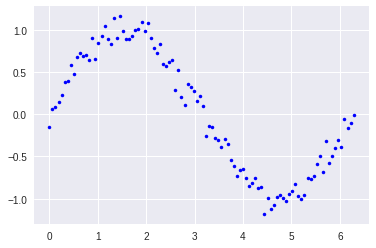

In [6]:
x = np.linspace(0,2*np.pi, 100)
y = np.sin(x) + 0.1*np.random.randn(100)
plt.plot(x,y,'b.')

##### Algoritmo backpropagation

O algoritmo *backpropagation* é uma algoritmo iterativo.

Inicialmente os pesos são incializados com valores aleatórios.

Em seguida, para cada época do algoritmo:

* 1. Para cada amostra da matriz $X$
    * 1.1 Calcula-se a saída do modelo $\hat{y}_i$ correspondente, assim como os outros valores necessários para se estimar as derivadas parciais ($h^{(1)}_{ij}$ e $u^{(1)}_{ij}$)
    * 1.2 Estima-se as derivadas parciais referentes aos pesos da camada de saída
    * 1.3 Atualiza-se os pesos da camada de saída utilizando a seguinte regra de atualização: $w^{(2)}_j = w^{(2)}_j - \alpha \frac{\partial J}{\partial w^{(2)}_j}$, para $j=0, \cdots, N_e$
    * 1.4 Estima-se as derivadas parciais referentes aos pesos da camada escondida
    * 1.3 Atualiza-se os pesos da camada de escondida utilizando a seguinte regra de atualização: $w^{(1)}_{jk} = w^{(1)}_{jk} - \alpha \frac{\partial J}{\partial w^{(1)}_{jk}}$, para $j=1, \cdots, N_e$ e $k=0,\cdots,d$

Agora, você deve implementar a função de treinamento da rede.

A função recebe como argumentos:

* uma matriz $X$, contendo $n$ vetores de entrada, de dimensão $n \times d$ (cada vetor de entrada está representado como uma linha da matriz, ou seja, cada linha da matriz corresponde a $\mathbf{x}_i^T$)
* uma matriz com as saídas correspondentes $y$, de dimensão $n \times 1$
* o número de neurônios na camada escondida, $N_e$
* a taxa de aprendizado do algoritmo do gradiente descendente estocástico, $\alpha$
* o número de épocas de treinamento, *n_epochs*

E retorna as matrizes de pesos $W^{(1)}$, de dimensão $N_e \times d +1 $, $W^{(2)}$, de dimensão $m \times N_e + 1$.

In [7]:
h1.shape

(400, 3)

In [0]:
def tanh(z):
    return np.tanh(z)

def sech(z):
    return (1/np.cosh(z))

def linear(z):
    return z

def compute_regression_net_output(X, W1, W2):
    n,d = X.shape
    Ne = W1.shape[0]
    m = y.shape[1]
    
    u1 = np.zeros((n,Ne))
    h1 = np.zeros((n,Ne))
    u2 = np.zeros(m)
    y_hat = np.zeros((n,m))
   
    bias = np.ones(n)
  
    u1 = np.dot(X, W1.T)

    h1 = tanh(u1)

    #adiciona o bias
    h1 = np.c_[bias, h1]

    u2 = np.dot(h1, W2.T)

    y_hat = linear(u2)   
    
    return y_hat,h1,u1

def train_regressor(X, y, Ne, alpha, n_epochs):
    n,d = X.shape
    m = y.shape[1]
    
    W1 = np.random.uniform(-1.0, 1.0, (Ne, d +1 ))
    W2 = np.random.uniform(-1.0, 1.0, (m, Ne+ 1))
    
    u1 = np.zeros(Ne)
    h1 = np.zeros(Ne)
    u2 = np.zeros(m)
    y_hat = np.zeros(m)
    
    bias = np.ones(n)
    
    X = np.c_[bias, X]    
    
    fig = plt.figure(figsize=(15,5))
    gs = gridspec.GridSpec(1,2)
    
    rmse = np.zeros(n_epochs)
    # For each epoch
    for idx in range(n_epochs):
        
        # FOR EACH SAMPLE
        for i in range(n):
            # Compute the network output
            y_hat, h1,u1 = compute_regression_net_output(X[i,:], W1, W2)
                        
            # Update the weights using the gradient descent rules
            for j in range(len(W2)):
              W2[j] = W2[j] - alpha * (-2*(y[i] - y_hat) * h1[j] )
            
            w, h = W1.shape
            
            for j in range(w):
              for k in range(h):
                parte1 = -2*(y[i] - y_hat) * W2[0,j+1]
                parte2 = np.dot(np.power(sech(u1[0, j]), 2), X[i,k])
                W1[j,k] = W1[j,k] - alpha * np.dot( parte1, parte2.T )
        
        # Plot the Network Output and the RMSE as a function of the epochs
        yout,_,_ = compute_regression_net_output(X, W1, W2);   
        rmse[idx] = np.sqrt(sum(np.asarray(y-yout)**2)/n)
        if (idx==0 or np.mod(idx, 10) == 0):
            plt.subplot(gs[0])
            plt.cla()
            xplot = np.linspace(-1.0, 1.0, 100)
            x_in = np.c_[bias, xplot]
            yplot,_,_ = compute_regression_net_output(x_in, W1, W2)
            plt.plot(xplot,yplot, 'g-', label='Network Output')
            plt.plot(X[:,1], y,'b.', label='Train Samples')
            plt.legend(loc='best')
            plt.title('Epoch: %d'%(idx))
        
            plt.subplot(gs[1])
            plt.cla()
            plt.title('Epoch: %d - RMSE: %.4f'%(idx+1,rmse[idx]))
            plt.plot(rmse[:idx],'b-')
            plt.xlabel('Epochs')
            plt.ylabel('RMSE')
            display.clear_output(wait=True)
            display.display(plt.gcf())

    display.clear_output(wait=True)      
    return W1, W2

Depois que você implementar a função de treinamento e executadar a próxima célula, você deverá visualizar, ao final do treinamento, uma figura similar a figura abaixo.



<img src="http://test.solnix.com.br/img/sin_train_result.png">


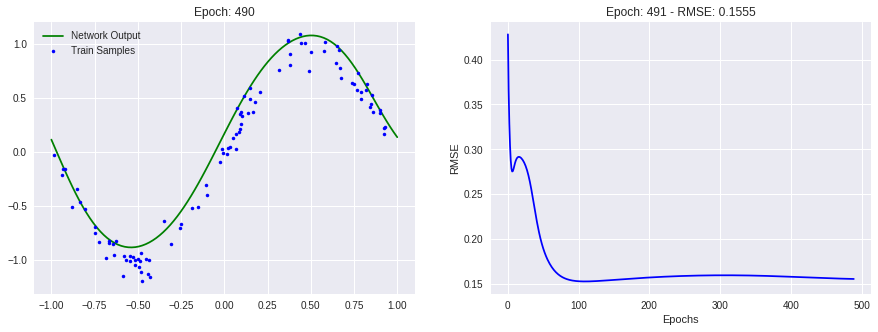

In [68]:
# Generate training Samples
n = 100
sigma = 0.1

def gen_fun(X):
    x = np.asarray(X)
    y = np.sin(2*np.pi*x*0.5)
    return y

X = np.asmatrix(2*np.random.uniform(size=n)-1).T
noise = np.random.normal(scale=sigma, size=n)
y = gen_fun(X) + np.asmatrix(noise).T


# Call train function
W1, W2 = train_regressor(X,y, Ne=3, alpha = 0.1, n_epochs = 500)